## Imports

In [144]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

FOLDER = '../backpropagation/results'

## Data Sets dict

In [175]:
columns = ['name', 'num_entries', 'num_labels', 'layers']
values = [
    ('wines', 13, 3, list([3,4])),
    ('cancer', 30, 2, list([3])),
    ('ionosphere', 34, 2, list([3,4])),
    ('pima', 8, 2, list([3,4]))
]
DATASETS = pd.DataFrame(values, columns=columns)
#print(DATASETS)

## Plots

In [176]:
def plot_training_accuracy(dataframe, smooth_sigma=0.0, output_file='', title_prefix=''):
    acc = dataframe['acc']
    val_acc = dataframe['val_acc']
    epochs = range(len(acc))

    fig1 = plt.figure(figsize=(15, 5))
    plt1 = fig1.add_subplot(111)
    plt1.set_title(title_prefix + 'Training (red) and validation (blue) accuracy')
    plt1.set_ylabel('Accuracy', fontsize='large')
    plt1.set_xlabel('Epochs', fontsize='large')
    
    acc_val_text = ('Validation\n'+
                 'Mean: {:.2f}\n'+
                 'Max: {:.2f}\n' +
                 'Min: {:.2f}\n' +
                 'Std: {:.2f}\n' +
                 'Final: {:.2f}').format(
                  val_acc.mean(), val_acc.max(), val_acc.min(), val_acc.std(), val_acc.iloc[-1]) 

    acc_text = ('Training\n'+
                 'Mean: {:.2f}\n'+
                 'Max: {:.2f}\n' +
                 'Min: {:.2f}\n' +
                 'Std: {:.2f}\n' +
                 'Final: {:.2f}').format(
                  acc.mean(), acc.max(), acc.min(), acc.std(), acc.iloc[-1]) 
    
    if smooth_sigma > 0:
        acc = gaussian_filter1d(acc, sigma=smooth_sigma)
        val_acc = gaussian_filter1d(val_acc, sigma=smooth_sigma)
    
    plt1.plot(epochs, acc, 'r')
    plt1.plot(epochs, val_acc, 'b')
    
    plt1.text(0.9, 0.4, acc_val_text, transform=plt1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='blue', alpha=0.15))
    plt1.text(0.8, 0.4, acc_text, transform=plt1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.15))
    if output_file:
        plt.savefig(output_file)
    plt.show()


def plot_training_loss(dataframe, smooth_sigma=0.0, output_file='', title_prefix=''):
    loss = dataframe['loss']
    val_loss = dataframe['val_loss']
    epochs = range(len(dataframe))

    fig1 = plt.figure(figsize=(15, 5))
    plt1 = fig1.add_subplot(111)
    plt1.set_title(title_prefix + 'Training (red) and validation (blue) loss')
    plt1.set_ylabel('Loss', fontsize='large')
    plt1.set_xlabel('Epochs', fontsize='large')  
    
    loss_val_text = ('Validation\n'+
                 'Mean: {:.2f}\n'+
                 'Max: {:.2f}\n' +
                 'Min: {:.2f}\n' +
                 'Std: {:.2f}\n' +
                 'Final: {:.2f}').format(
                  val_loss.mean(), val_loss.max(), val_loss.min(), val_loss.std(), val_loss.iloc[-1]) 

    loss_text = ('Training\n'+
                 'Mean: {:.2f}\n'+
                 'Max: {:.2f}\n' +
                 'Min: {:.2f}\n' +
                 'Std: {:.2f}\n' +
                 'Final: {:.2f}').format(
                  loss.mean(), loss.max(), loss.min(), loss.std(), loss.iloc[-1]) 
    if smooth_sigma > 0:
        loss = gaussian_filter1d(loss, sigma=smooth_sigma)
        val_loss = gaussian_filter1d(val_loss, sigma=smooth_sigma)
    
    
    plt1.plot(epochs, loss, 'r')
    plt1.plot(epochs, val_loss, 'b')
    
    plt1.text(0.9, 0.95, loss_val_text, transform=plt1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='blue', alpha=0.15))
    plt1.text(0.8, 0.95, loss_text, transform=plt1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.15))
    if output_file:
        plt.savefig(output_file)
    plt.show()
    
    
def plot_learning_curve(dataframe, smooth_sigma=0.0, output_file='', title_prefix=''):
    loss = dataframe['loss']
    val_loss = dataframe['val_loss']
    epochs = dataframe['examples']

    fig1 = plt.figure(figsize=(15, 5))
    plt1 = fig1.add_subplot(111)
    plt1.set_title(title_prefix + 'Training (red) and validation (blue) loss')
    plt1.set_ylabel('Loss', fontsize='large')
    plt1.set_xlabel('Examples', fontsize='large')  
    
    loss_val_text = ('Validation\n'+
                 'Mean: {:.2f}\n'+
                 'Max: {:.2f}\n' +
                 'Min: {:.2f}\n' +
                 'Std: {:.2f}\n' +
                 'Final: {:.2f}').format(
                  val_loss.mean(), val_loss.max(), val_loss.min(), val_loss.std(), val_loss.iloc[-1]) 

    loss_text = ('Training\n'+
                 'Mean: {:.2f}\n'+
                 'Max: {:.2f}\n' +
                 'Min: {:.2f}\n' +
                 'Std: {:.2f}\n' +
                 'Final: {:.2f}').format(
                  loss.mean(), loss.max(), loss.min(), loss.std(), loss.iloc[-1]) 
    if smooth_sigma > 0:
        loss = gaussian_filter1d(loss, sigma=smooth_sigma)
        val_loss = gaussian_filter1d(val_loss, sigma=smooth_sigma)
    
    
    plt1.plot(epochs, loss, 'r')
    plt1.plot(epochs, val_loss, 'b')
    
    plt1.text(0.9, 0.95, loss_val_text, transform=plt1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='blue', alpha=0.15))
    plt1.text(0.8, 0.95, loss_text, transform=plt1.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.15))
    if output_file:
        plt.savefig(output_file)
    plt.show()

## F1-score

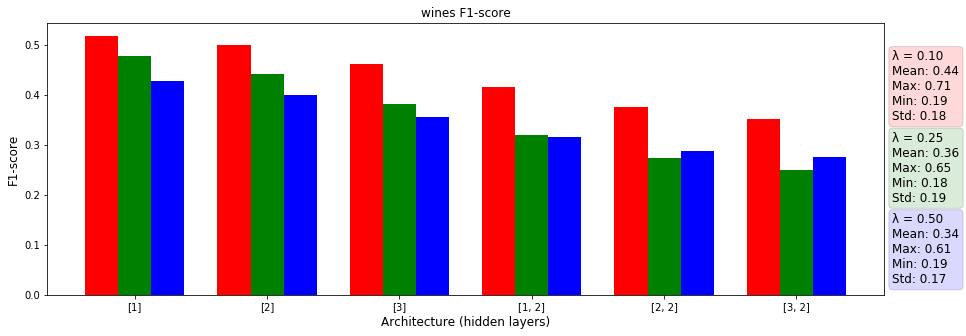

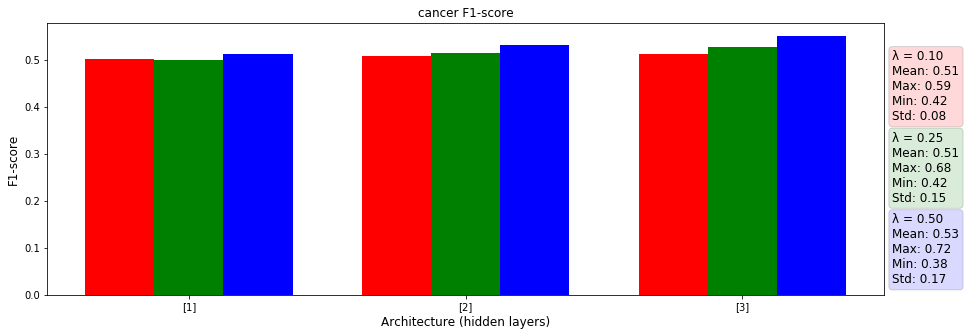

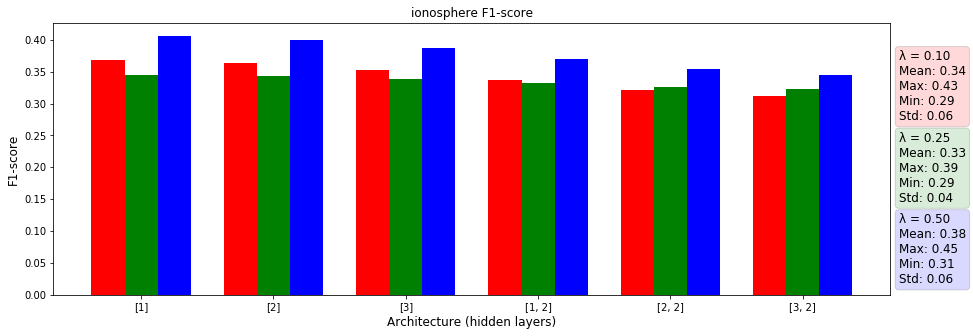

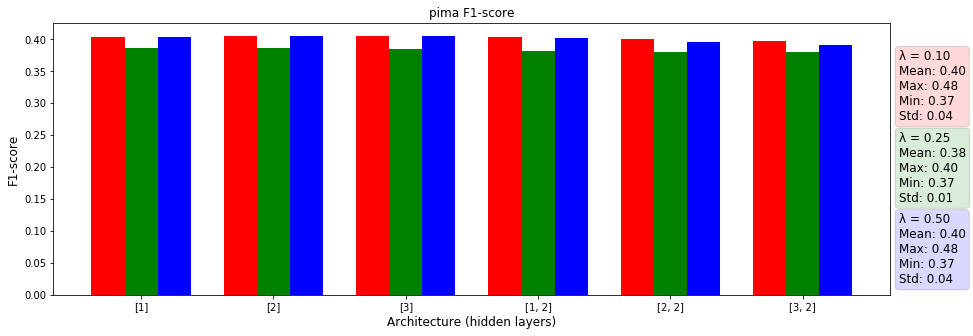

In [177]:
def plot_f1_score(dataset_name, result_file, smooth_sigma=0.0, output_file=''):
    
    dataframe = pd.read_csv(result_file)
    dataset_df = DATASETS[DATASETS['name']==dataset_name]
    res = {
        'architecture': [],
        'regularization':[],
        'f1': []
    }
    #print(dataset_df)
    
    full_archs = []
    archs = []
    
    row_index = int(dataset_df.index[0])
    num_entries = dataset_df['num_entries'][row_index]
    num_labels = dataset_df['num_labels'][row_index]
    layers = dataset_df['layers'][row_index]
    
    if 3 in layers:
        for i in range(1,4): # 3 layers
            full_archs.append('[{}, {}, {}]'.format(num_entries, i, num_labels))
            archs.append('[{}]'.format(i))

    if 4 in layers:
        for i in range(1,4): # 4 layers
            full_archs.append('[{}, {}, 2, {}]'.format(num_entries, i, num_labels))
            archs.append('[{}, 2]'.format(i))
    
    
    regularizations = dataframe['regularization'].unique()

    for arch in full_archs:
        for reg in regularizations:
            res['architecture'].append(arch)
            res['regularization'].append(reg)

            cross_df = dataframe[(dataframe['architecture']==arch) & 
                                 (dataframe['regularization'] == reg)]

            folds = cross_df['fold'].unique()
            f1 = 0

            for fold in folds:
                fold_df = cross_df[(cross_df['fold'] == fold)]
                precision = fold_df.loc[:,'precision_macro'].mean()
                recall = fold_df.loc[:,'recall_macro'].mean()
                f1 += 2 * (precision * recall) / (precision + recall)
            
            res['f1'].append(f1/len(folds))
    
    res_df = pd.DataFrame(res)
    #print(res_df)
    
    fig1 = plt.figure(figsize=(15, 5))
    plt1 = fig1.add_subplot(111)
    plt1.set_title(dataset_name + ' F1-score')
    plt1.set_ylabel('F1-score', fontsize='large')
    plt1.set_xlabel('Architecture (hidden layers)', fontsize='large')

    archs_range = range(len(archs))
    
    
    colors = ['red', 'green', 'blue']
    barWidth = 0.25
    position = None
    i = 0
    for reg in regularizations:
        reg_df = res_df[(res_df['regularization'] == reg)]['f1']
        if position == None:
            position = range(len(archs))
        else:
            position = [x + barWidth for x in position]
        
        text = ('λ = {:.2f}\n'+
                'Mean: {:.2f}\n'+
                'Max: {:.2f}\n' +
                'Min: {:.2f}\n' +
                'Std: {:.2f}').format(
                reg, reg_df.mean(), reg_df.max(), reg_df.min(), reg_df.std()) 

        if smooth_sigma > 0:
            reg_df = gaussian_filter1d(reg_df, sigma=smooth_sigma)
    
        plt1.bar(position, reg_df, color=colors[i], width=0.25)
        plt1.text(1.01, 0.9 - i*0.3, text, transform=plt1.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor=colors[i], alpha=0.15))
        i += 1
        
    plt.xticks([r + barWidth for r in archs_range], archs)
    
    if output_file:
        plt.savefig(output_file)
    plt.show()
    
#------------------------------
plot_all_f1 = True

if plot_all_f1: #plot all datasets
    for index,row in DATASETS.iterrows():
        dataset_name = row['name']
        result_file = '{}/{}-final-result.csv'.format(FOLDER, dataset_name)
        output_file = '{}/{}-f1.png'.format(FOLDER, dataset_name)
        plot_f1_score(dataset_name, result_file, smooth_sigma=2, output_file=output_file)
        
else: # plot only one dataset
    DATASET_NAME = 'wines'
    RESULT_FILE = '{}/{}-final-result.csv'.format(FOLDER, DATASET_NAME)
    OUTPUT_FILE = '{}_f1.png'.format(FOLDER, DATASET_NAME)
    plot_f1_score(DATASET_NAME, RESULT_FILE, smooth_sigma=2, output_file=OUTPUT_FILE)

## Compare performance with(out) Momentum Method

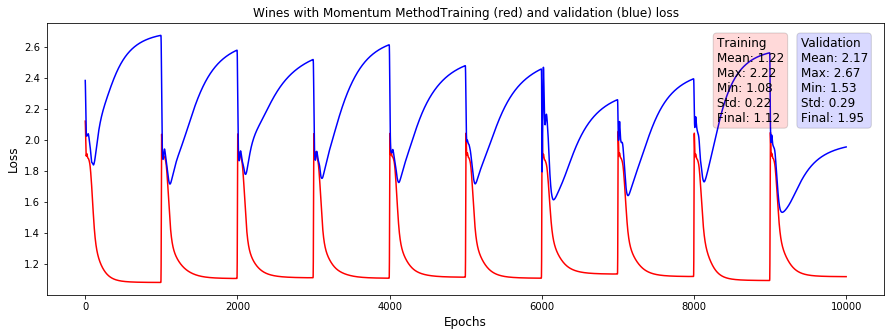

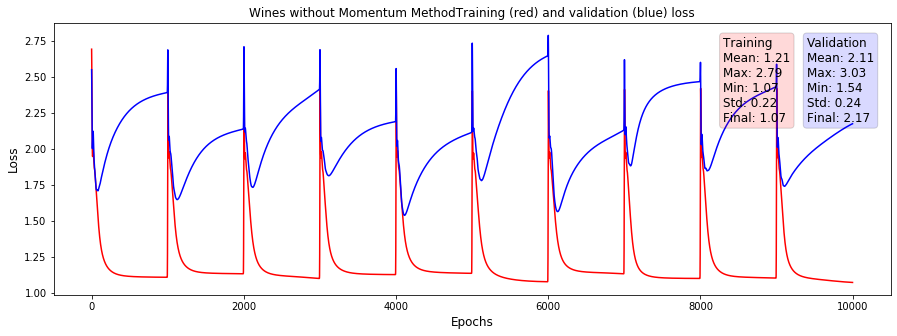

In [157]:
def plot_MM_version(withMM):
    text = ('' if withMM else 'out')
    
    result_file = 'data/wines-1000-epochs-with{}-momentum.csv'.format(text)
    dataframe = pd.read_csv(result_file)
    title_prefix = 'Wines with{} Momentum Method'.format(text)

    output_file = '{}/learning-curve-wines-with{}-momentum.png'.format(FOLDER, text)
    #plot_learning_curve(dataframe, smooth_sigma=2.0, output_file=output_file, title_prefix=title_prefix)

    output_file = '{}/training-loss-wines-with{}-momentum.png'.format(FOLDER, text)
    plot_training_loss(dataframe, smooth_sigma=2.0, output_file=output_file, title_prefix=title_prefix)

plot_MM_version(True)
plot_MM_version(False)

## List architectures ordered by performance

In [10]:
final = pd.DataFrame()

res = {
    'architecture': [],
    'regularization':[],
    'loss':[],
    'acc':[],
    'val_loss':[],
    'val_acc': []
}

for arch in archs:
    regularizations = df[df['architecture'] == arch]['regularization'].unique()
    for reg in regularizations:
        res['architecture'].append(arch)
        res['regularization'].append(reg)
        
        cross_df = df[(df['architecture']==arch) &
                      (df['regularization'] == reg)]
        
        folds = cross_df['fold'].unique()
        res_cros = pd.DataFrame()
        
        for fold in folds:
            fold_df = cross_df[(cross_df['fold'] == fold) &
                               (cross_df['epoch'] == 1000)]
            res_cros = res_cros.append(fold_df, ignore_index=True)
        
        for k in res.keys():
            if k not in ['architecture', 'regularization']:
                res[k].append(res_cros[k].mean())
                
res_df = pd.DataFrame(res)
res_df.sort_values(by=['loss', 'val_loss'])

NameError: name 'archs' is not defined

# Generating plots

## Learning curve

In [12]:
RESULT_FILE = 'data/wines-learning-curve-step-5.csv'
RESULT_FOLDER = 'data/wines-with-momentum'
DATASET_NAME = 'Wines learning curve'

In [13]:
df = pd.read_csv(RESULT_FILE)

In [19]:
plot_learning_curve(df, smooth_sigma=2)

## Plots from multi configs networks

In [47]:
RESULT_FILE = 'data/wines-1000-epochs-with-momentum.csv'
RESULT_FOLDER = 'data/wines-with-momentum'
DATASET_NAME = 'Wines with Momentum'

if RESULT_FOLDER:
    try:
        os.makedirs(RESULT_FOLDER)
    except:
        pass

In [48]:
df = pd.read_csv(RESULT_FILE)

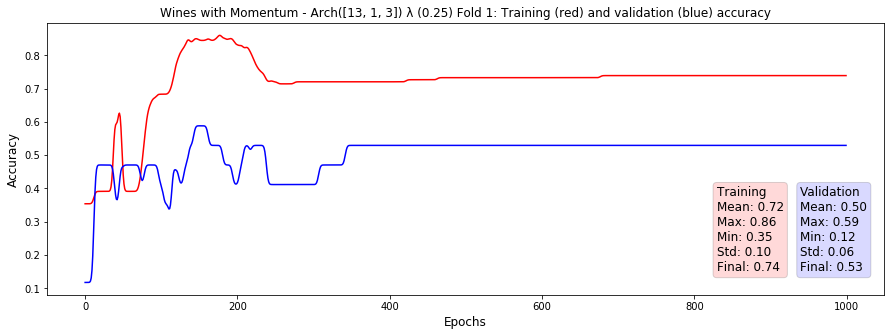

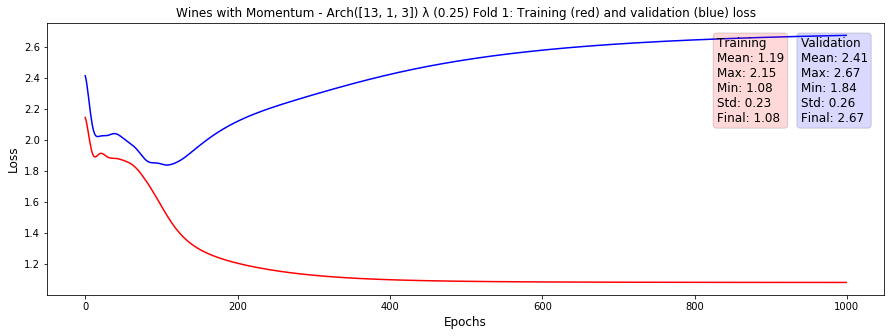

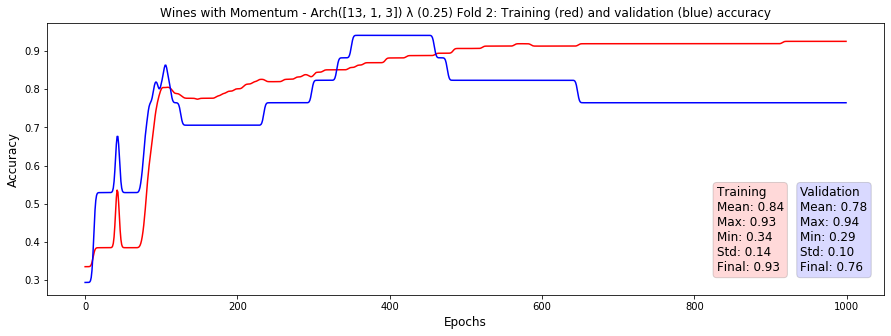

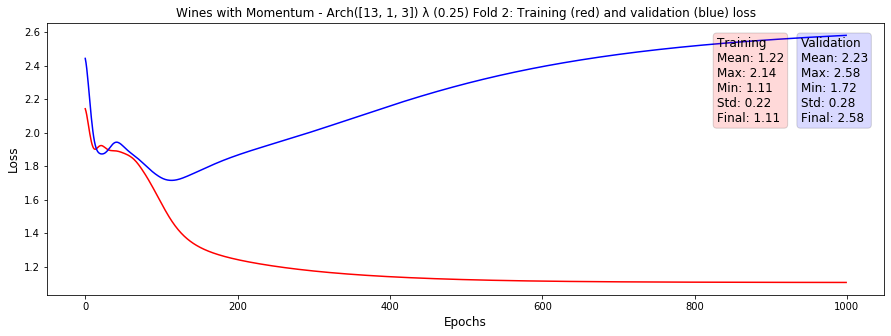

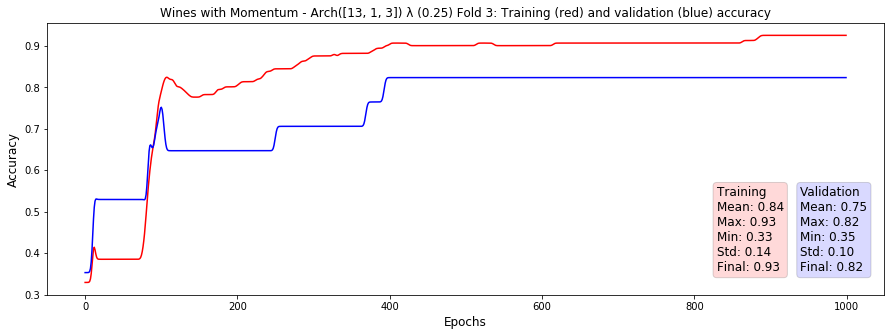

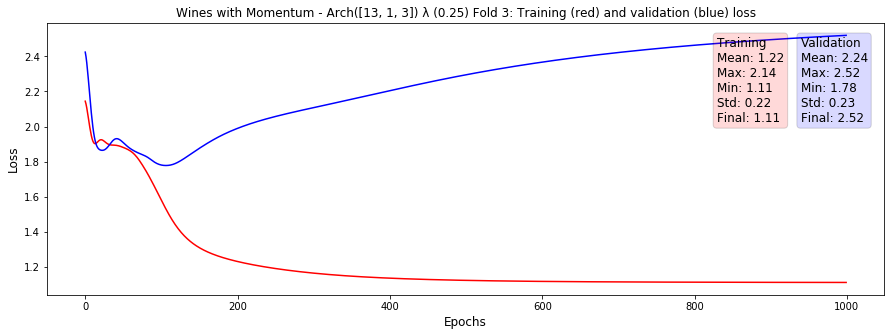

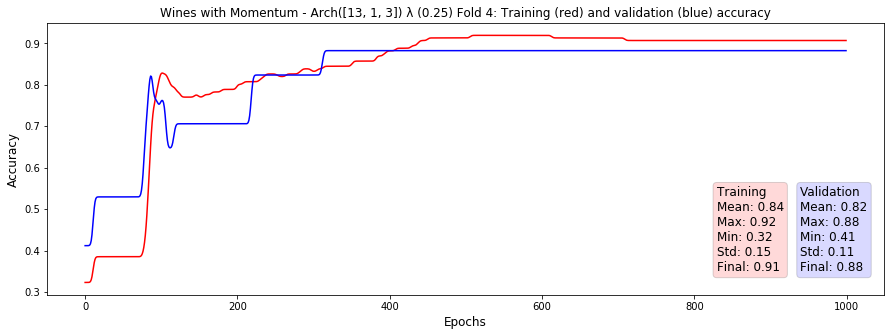

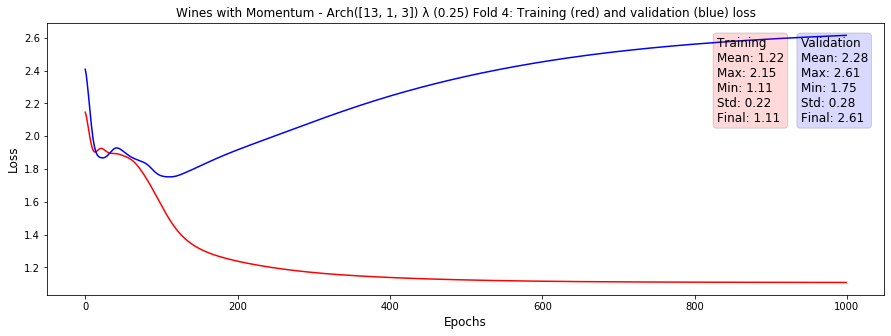

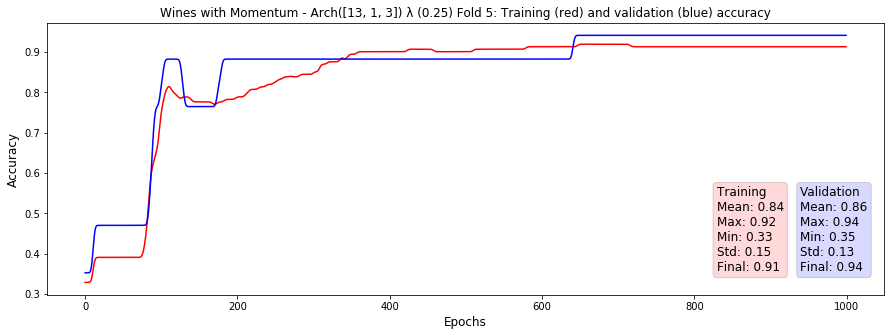

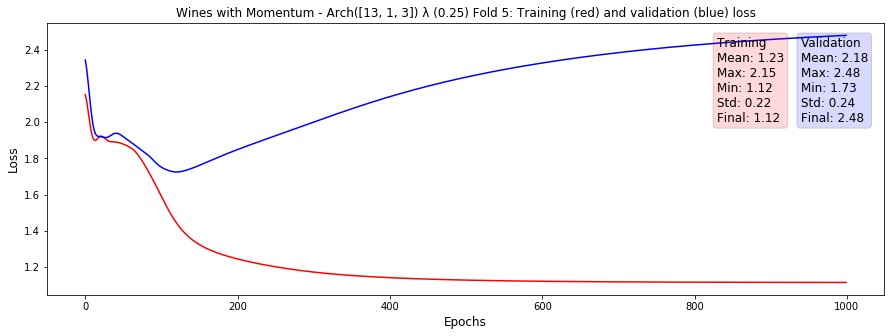

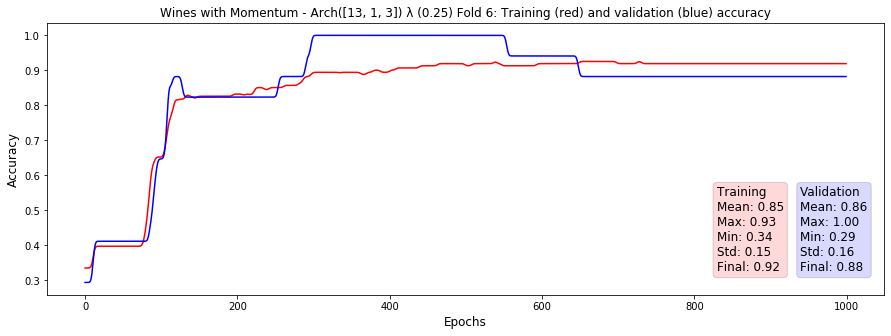

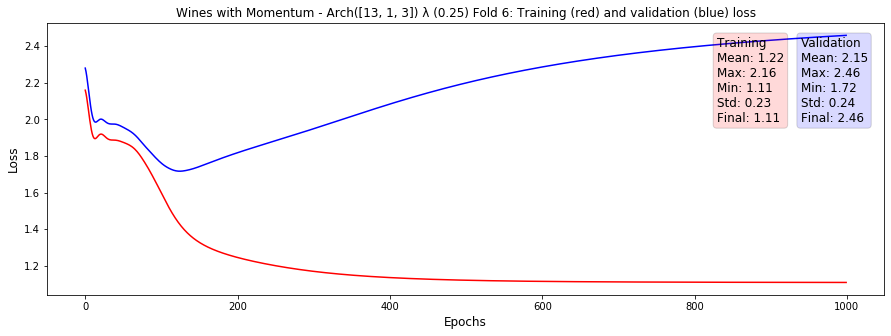

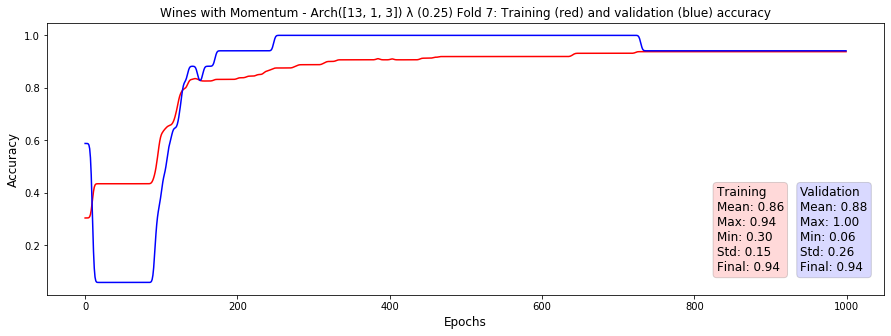

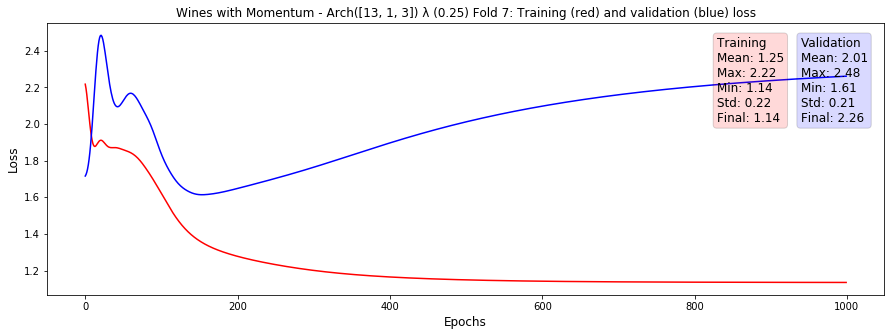

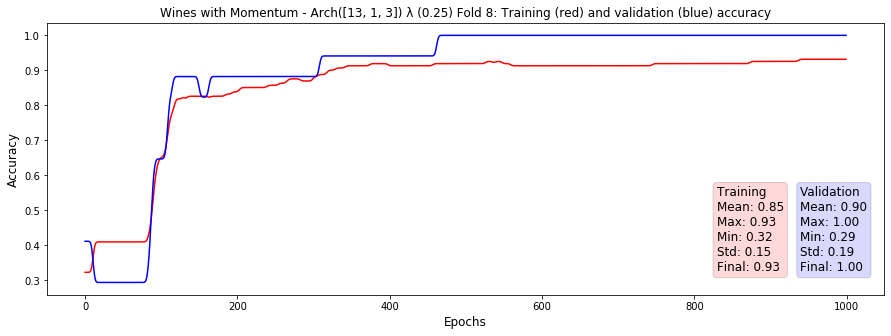

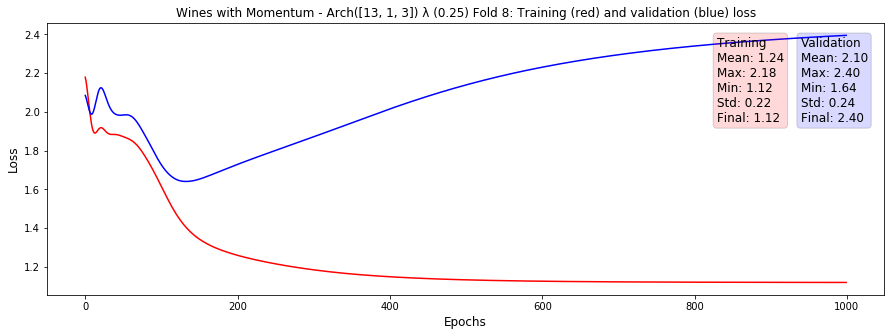

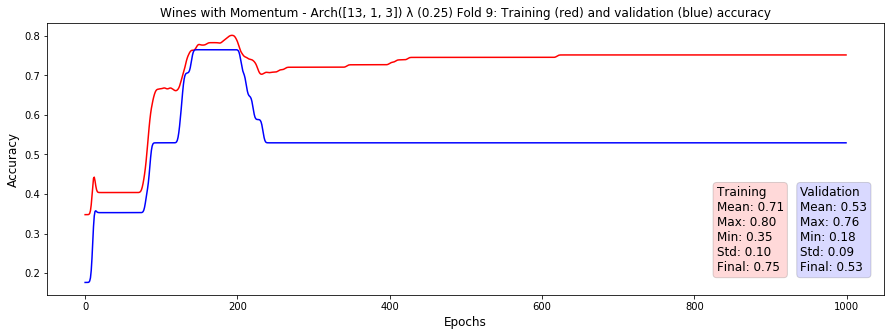

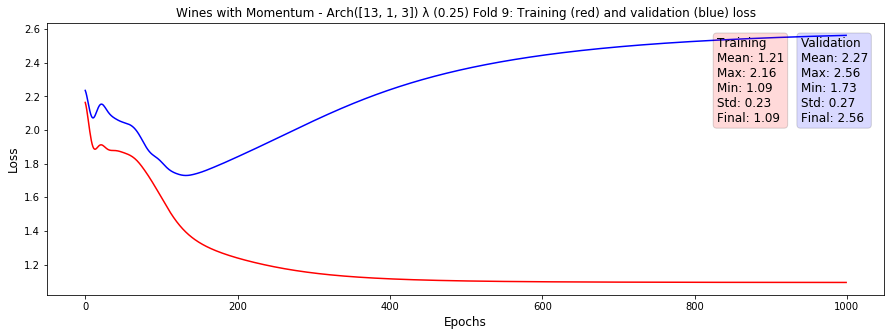

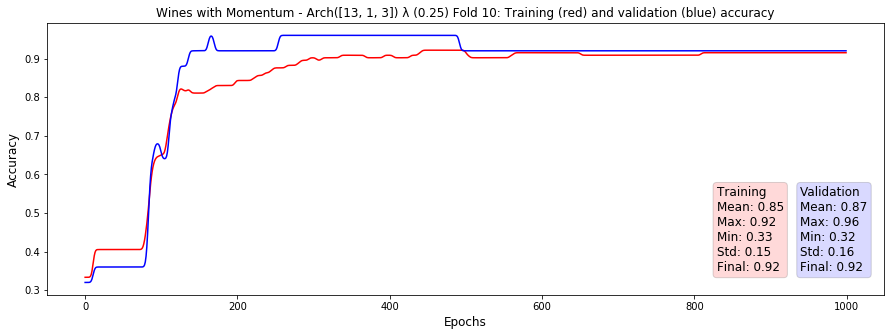

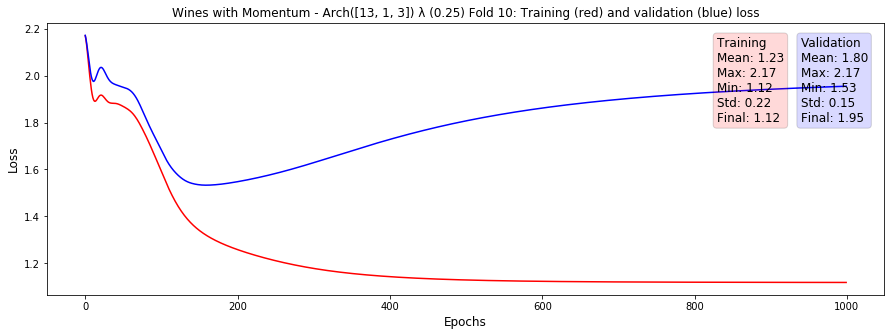

In [49]:
for arch in archs:
    regularizations = df[df['architecture'] == arch]['regularization'].unique()
    for reg in regularizations:
        cross_df = df[(df['architecture']==arch) &
                      (df['regularization'] == reg)]
        
        folds = cross_df['fold'].unique()
        
        for fold in folds:
            fold_df = cross_df[cross_df['fold'] == fold]
#             print(arch, reg, len(cross_df), fold, len(fold_df))
            title = '{} - Arch({}) λ ({}) Fold {}: '.format(DATASET_NAME, arch, reg, fold)
            
            if RESULT_FOLDER:
                acc_folder = '{}/{}-arch-{}/reg-{}/acc'.format(RESULT_FOLDER, DATASET_NAME, arch, reg, fold)
                loss_folder = '{}/{}-arch-{}/reg-{}/loss'.format(RESULT_FOLDER, DATASET_NAME, arch, reg, fold)
                
                try:
                    os.makedirs(acc_folder)
                    os.makedirs(loss_folder)
                except:
                    pass
                
                acc_file = '{}/fold-{}.png'.format(acc_folder, fold)
                loss_file = '{}/fold-{}.png'.format(loss_folder, fold)
            else:
                acc_file, loss_file = ''
            
            plot_training_accuracy(fold_df, smooth_sigma=2, title_prefix=title, output_file=acc_file)
            plot_training_loss(fold_df, title_prefix=title, output_file=loss_file)